In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pandas as pd

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(housing.data, housing.target, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

c:\Users\travi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5245109352606162

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X_iris_full, X_iris_test, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)
X_iris_train, X_iris_valid, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter = 10_000,random_state=42)
pipeline_clf = make_pipeline(StandardScaler(), mlp_clf)
pipeline_clf.fit(X_iris_train, y_iris_train)
y_pred = pipeline_clf.predict(X_iris_test)
accuracy_score(y_iris_test, y_pred)

1.0

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [5]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0 # Scaling from 0-255 to 0-1

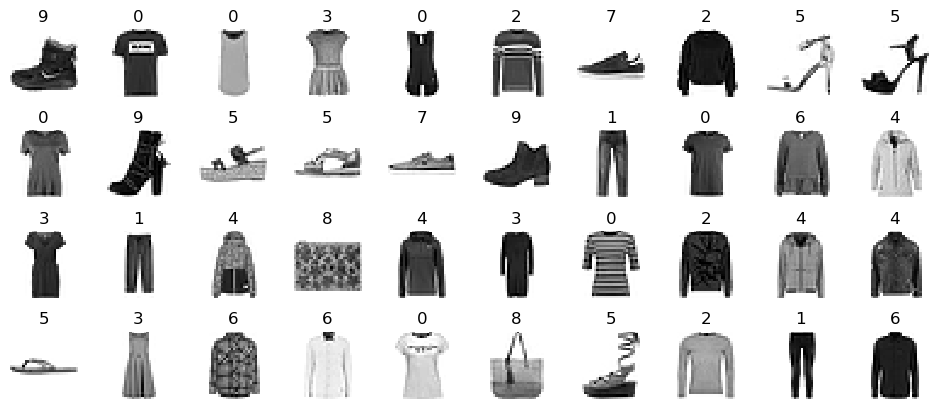

In [6]:
n_rows = 4 
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
class_names = ["T-shirt/top", "Pants", "Pullover", "Dress", "Jacket", "Sandal", "Shirt", "Sneaker","Bag", "Boot"]

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


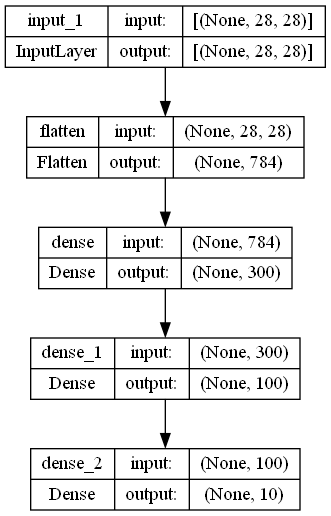

In [10]:
tf.keras.utils.plot_model(model)
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [11]:
model.layers

In [12]:
output_layer = model.get_layer('dense_2')
weights, biases = output_layer.get_weights()
weights

array([[ 0.05102551, -0.08812314,  0.22789407,  0.14615107, -0.16748057,
         0.04126987, -0.22535014, -0.05357906, -0.00711022,  0.16599524],
       [-0.01264201, -0.1943208 , -0.09615485,  0.07074133, -0.14936876,
        -0.1476574 ,  0.19266814,  0.04755905,  0.00388514, -0.0177515 ],
       [ 0.15687063, -0.16566253,  0.03440851, -0.01548778, -0.19493042,
         0.18325305,  0.09226933,  0.11509061,  0.20097882, -0.23314883],
       [ 0.09863651, -0.19977447,  0.0438562 ,  0.20367414,  0.0146776 ,
         0.1293585 ,  0.13758677,  0.00779562,  0.03061205, -0.04516971],
       [-0.13677152,  0.01366501,  0.07833833,  0.0506883 , -0.11940935,
         0.14975485,  0.18715417,  0.15663484, -0.19053304, -0.0184242 ],
       [ 0.00083412,  0.04188952, -0.227599  , -0.02639911, -0.11625783,
         0.01722637, -0.10269055,  0.19492257,  0.12372497,  0.13894731],
       [-0.16794819,  0.07247502, -0.13663214, -0.01314643, -0.15736455,
        -0.19989859, -0.0013777 ,  0.0642283 

In [13]:
print(weights.shape)
print(biases.shape)

(100, 10)
(10,)


In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7110 - accuracy: 0.7674 - val_loss: 0.4971 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4843 - accuracy: 0.8322 - val_loss: 0.4522 - val_accuracy: 0.8380
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4399 - accuracy: 0.8462 - val_loss: 0.4294 - val_accuracy: 0.8504
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4161 - accuracy: 0.8543 - val_loss: 0.3956 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3952 - accuracy: 0.8626 - val_loss: 0.3883 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8663 - val_loss: 0.3873 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3669 - accuracy: 0.8705 - val_loss: 0.3717 - val_accuracy:

In [17]:
print(history.params)
print(history.epoch)
pd.DataFrame(history.history).head(2)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


,loss,accuracy,val_loss,val_accuracy
0,0.710969,0.767418,0.497051,0.8288
1,0.484330,0.832218,0.452216,0.8380


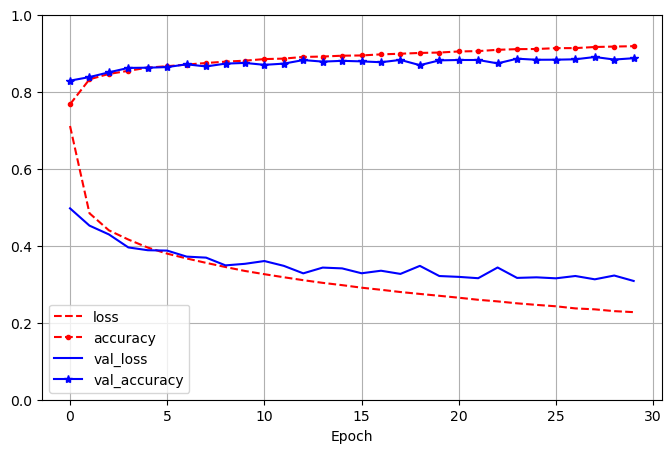

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5), ylim=[0,1], grid=True, xlabel="Epoch", style=['r--', 'r--.', 'b-','b-*'])
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 758us/step - loss: 0.3258 - accuracy: 0.8838


[0.32583972811698914, 0.8838000297546387]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 39ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

prediction:  ['Boot', 'Pullover', 'Pants']


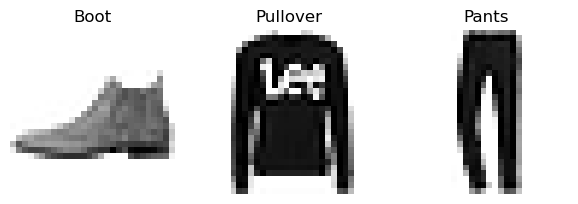

In [21]:
plt.figure(figsize=(7.2, 2.4))
y_pred = y_proba.argmax(axis=-1)
print("prediction: ", [class_names[y] for y in y_pred])
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [22]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 8.6175 - root_mean_squared_error: 2.9356 - val_loss: 8.4150 - val_root_mean_squared_error: 2.9010
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.3056 - root_mean_squared_error: 2.8819 - val_loss: 8.3920 - val_root_mean_squared_error: 2.8971
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2864 - root_mean_squared_error: 2.8786 - val_loss: 8.4133 - val_root_mean_squared_error: 2.9007
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2773 - root_mean_squared_error: 2.8770 - val_loss: 8.4291 - val_root_mean_squared_error: 2.9034
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2663 - root_mean_squared_error: 2.8751 - val_loss: 8.3929 - val_root_mean_squared_error: 2.8973
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2576 - root_mean_squared_error: 2.8736 - val_loss: 8

In [24]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [25]:
normalizating_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalizating_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [34]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["RootMeanSquaredError"])
normalizating_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/30
363/363 [==============================] - 1s 790us/step - loss: 0.2930 - root_mean_squared_error: 0.5413 - val_loss: 0.9242 - val_root_mean_squared_error: 0.9613
Epoch 2/30
363/363 [==============================] - 0s 625us/step - loss: 0.2909 - root_mean_squared_error: 0.5394 - val_loss: 1.0600 - val_root_mean_squared_error: 1.0295
Epoch 3/30
363/363 [==============================] - 0s 619us/step - loss: 0.2890 - root_mean_squared_error: 0.5376 - val_loss: 0.6777 - val_root_mean_squared_error: 0.8232
Epoch 4/30
363/363 [==============================] - 0s 619us/step - loss: 0.2843 - root_mean_squared_error: 0.5332 - val_loss: 0.8556 - val_root_mean_squared_error: 0.9250
Epoch 5/30
363/363 [==============================] - 0s 614us/step - loss: 0.2884 - root_mean_squared_error: 0.5370 - val_loss: 1.9104 - val_root_mean_squared_error: 1.3822
Epoch 6/30
363/363 [==============================] - 0s 618us/step - loss: 0.2948 - root_mean_squared_error: 0.5429 - val_loss: 2

array([[0.4340131],
       [1.0845933],
       [4.7718263]], dtype=float32)

In [39]:
#input layer
input_wide =tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
#normalization layer
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
#rest of the deep layers for input_deep
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#Output layer w/ concat on wide and deep layer
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [46]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_train_wide[:3], X_train_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))
print(f'mse_test: {mse_test}')
y_pred

Epoch 1/20
363/363 [==============================] - 1s 837us/step - loss: 0.3102 - root_mean_squared_error: 0.5570 - val_loss: 0.3332 - val_root_mean_squared_error: 0.5772
Epoch 2/20
363/363 [==============================] - 0s 633us/step - loss: 0.3005 - root_mean_squared_error: 0.5482 - val_loss: 0.2977 - val_root_mean_squared_error: 0.5456
Epoch 3/20
363/363 [==============================] - 0s 627us/step - loss: 0.2966 - root_mean_squared_error: 0.5446 - val_loss: 0.2876 - val_root_mean_squared_error: 0.5363
Epoch 4/20
363/363 [==============================] - 0s 638us/step - loss: 0.2995 - root_mean_squared_error: 0.5472 - val_loss: 0.2990 - val_root_mean_squared_error: 0.5468
Epoch 5/20
363/363 [==============================] - 0s 645us/step - loss: 0.2989 - root_mean_squared_error: 0.5467 - val_loss: 0.3028 - val_root_mean_squared_error: 0.5503
Epoch 6/20
363/363 [==============================] - 0s 658us/step - loss: 0.2974 - root_mean_squared_error: 0.5453 - val_loss: 0

array([[3.4591775],
       [1.9125746],
       [2.4127722]], dtype=float32)

In [47]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()

norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#Using multiple outputs in 1 layer
output = tf.keras.layers.Dense(1)(concat)
output_aux = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, output_aux])

In [49]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9,0.1), optimizer=optimizer, metrics=['RootMeanSquaredError'])

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(f'weight sum of losses: {weighted_sum_of_losses}\nmain_loss: {main_loss}, aux_loss: {aux_loss}\nmain_rmse: {main_rmse}, aux_rmse:{aux_rmse}')        

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5445 - dense_2_loss: 1.4829 - dense_3_loss: 2.0988 - dense_2_root_mean_squared_error: 1.2177 - dense_3_root_mean_squared_error: 1.4487 - val_loss: 2.0349 - val_dense_2_loss: 1.6405 - val_dense_3_loss: 5.5844 - val_dense_2_root_mean_squared_error: 1.2808 - val_dense_3_root_mean_squared_error: 2.3631
Epoch 2/20
363/363 [==============================] - 0s 732us/step - loss: 0.5257 - dense_2_loss: 0.5001 - dense_3_loss: 0.7554 - dense_2_root_mean_squared_error: 0.7072 - dense_3_root_mean_squared_error: 0.8691 - val_loss: 1.0519 - val_dense_2_loss: 0.9923 - val_dense_3_loss: 1.5885 - val_dense_2_root_mean_squared_error: 0.9962 - val_dense_3_root_mean_squared_error: 1.2603
Epoch 3/20
363/363 [==============================] - 0s 739us/step - loss: 0.4527 - dense_2_loss: 0.4371 - dense_3_loss: 0.5939 - dense_2_root_mean_squared_error: 0.6611 - dense_3_root_mean_squared_error: 0.7706 - val_loss: 0.5774 - val_dense_2_

In [53]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(f'main guesses: {[x[0] for x in y_pred_main]}')
print(f'aux guesses: {[x_aux[0] for x_aux in y_pred_aux]}')
print(f'actual: {[y for y in y_train[:3]]}')

1/1 [==============================] - 0s 11ms/step
main guesses: [3.3998165, 1.8560534, 2.3689146]
aux guesses: [3.1931956, 1.9129516, 2.3210251]
actual: [1.442, 1.687, 1.621]


In [57]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 10ms/step


{'dense_2': array([[3.3998165],
        [1.8560534],
        [2.3689146]], dtype=float32),
 'dense_3': array([[3.1931956],
        [1.9129516],
        [2.3210251]], dtype=float32)}

In [58]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation='relu', name="Subclass_model") 

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Epoch 1/10
363/363 [==============================] - 1s 994us/step - loss: 1.8428 - output_1_loss: 1.8780 - output_2_loss: 1.5262 - output_1_root_mean_squared_error: 1.3704 - output_2_root_mean_squared_error: 1.2354 - val_loss: 0.7883 - val_output_1_loss: 0.7912 - val_output_2_loss: 0.7620 - val_output_1_root_mean_squared_error: 0.8895 - val_output_2_root_mean_squared_error: 0.8729
Epoch 2/10
363/363 [==============================] - 0s 769us/step - loss: 0.6427 - output_1_loss: 0.6416 - output_2_loss: 0.6527 - output_1_root_mean_squared_error: 0.8010 - output_2_root_mean_squared_error: 0.8079 - val_loss: 2.9427 - val_output_1_loss: 3.0490 - val_output_2_loss: 1.9856 - val_output_1_root_mean_squared_error: 1.7461 - val_output_2_root_mean_squared_error: 1.4091
Epoch 3/10
363/363 [==============================] - 0s 739us/step - loss: 0.5283 - output_1_loss: 0.5226 - output_2_loss: 0.5794 - output_1_root_mean_squared_error: 0.7229 - output_2_root_mean_squared_error: 0.7612 - val_loss:

In [62]:
print(f'weight sum of losses: {weighted_sum_of_losses}\nmain_loss: {main_loss}, aux_loss: {aux_loss}\nmain_rmse: {main_rmse}, aux_rmse:{aux_rmse}')  
print(f'main guesses: {[x[0] for x in y_pred_main]}')
print(f'aux guesses: {[x_aux[0] for x_aux in y_pred_aux]}')
print(f'actual: {[y for y in y_train[:3]]}')

weight sum of losses: 0.351899117231369
main_loss: 0.34365665912628174, aux_loss: 0.4260815382003784
main_rmse: 0.5862223505973816, aux_rmse:0.652749240398407
main guesses: [3.1568303, 2.1380525, 1.8535683]
aux guesses: [3.0579002, 2.1896458, 2.1158202]
actual: [1.442, 1.687, 1.621]


In [63]:
model.save("First_Keras_model", save_format="tf")

INFO:tensorflow:Assets written to: First_Keras_model\assets


INFO:tensorflow:Assets written to: First_Keras_model\assets


In [65]:
model = tf.keras.models.load_model("First_Keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))  
print(f'main guesses: {[y[0] for y in y_pred_main]}')
print(f'aux guesses: {[y_aux[0] for y_aux in y_pred_aux]}')

1/1 [==============================] - 0s 33ms/step
main guesses: [3.1568308, 2.1380525, 1.8535684]
aux guesses: [3.0579002, 2.1896458, 2.1158202]
